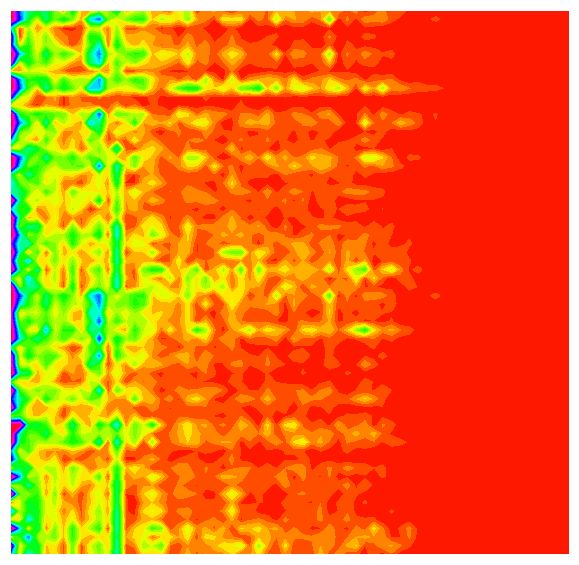

In [10]:
#import packages
import csv
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits import mplot3d
from PIL import Image, ImageChops
from matplotlib.pyplot import figure
from scipy.fftpack import fft, ifft

#image cropping function used to get rid of white space
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

#set path to csv data
path_to_imgs = "/Users/mike/Documents/ucsc/cmps240/EEG_classification/EEG_Alcoholism_Classification/Data/S3/alcoholic"
for filename in os.listdir(path_to_imgs):
    #get csv files
    if filename.endswith(".csv"):
        sys.__stdout__.write(filename+"\n")
        sys.stdout = open('/dev/stdout', 'w')
        #set full path and load csv data into a panda dataframe
        path = path_to_imgs + "/" + filename
        data = pd.read_csv(path, sep=' ', usecols=['channel', 'time', 'voltage'])

        # create empty arrays
        x_s0 = np.empty([64, 256])
        y_s0 = np.empty([64, 256])

        # store channels in respective array indexi
        for i in range(64):
            start = i*256
            end = (i+1)*256
            x_s0[i] = data.iloc[start:end, 1]
            y_s0[i] = data.iloc[start:end, 2]

        # create empty array with dtype=complex
        yf_s0 = np.empty([64,256], dtype=complex)    

        # compute and store fft for each channel
        for i in range(64):
            yf_s0[i] = fft(y_s0[i])

        # prepare data
        N = 256
        #y = np.arange(0, 64, 1) # allocate 64 channels
        #x = np.linspace(0.0, 128.0, 128) #128 freqz
        y = np.arange(0, 64, 1)
        x = np.arange(0, 64, 1)
        X, Y = np.meshgrid(x,y)


        X, Y = np.meshgrid(x,y)

        # can change range of frequency vales by replacing 128 with 64. produces (64x64) plot
        Z = np.abs(yf_s0[:,0:64])
        for i in range(0, len(Z)):
            for j in range(0,64):
                if Z[i][j] > 800:
                   Z[i][j] = 800
        X = X[0:64]
        Z = Z[0:64]
        # plot topological grid figure
        plt.rcParams['figure.figsize'] = [10, 10]
        fig = plt.contourf(X, Y, Z, cmap='hsv',levels=np.linspace(0,800,30));
        
        # plot pseudocolor plot
        #fig, ax0 = plt.subplots(1, 1)
        #c = ax0.pcolor( Z, norm=LogNorm(vmin=Z.min(), vmax=Z.max()),cmap='hsv' )

ax0.set_title('spectrogram (not really, more like a channel heatmap)')
ax0.set_xlabel('Frequency (Hz)')
ax0.set_ylabel('Channel')

        # Turn off tick labels
        plt.xticks([])
        plt.yticks([])

        #remove frame
        plt.axis('off')

        #set to path image directory
        img_dir = "/Users/mike/Documents/ucsc/cmps240/EEG_classification/EEG_Alcoholism_Classification/Data/images/s3/alcoholic"
        filename = filename = filename[:-4] #remove .csv ext.
        filename = filename+".jpg" #chang to .jpg extension
        filename = img_dir+"/"+filename #set path name w var name
        plt.savefig(filename, bbox_inches='tight', pad_inches=0) #save plot
        
        #crop image border
        im = Image.open(filename)
        trim(im).save(filename)
print("complete")